In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import requests

import random as random
import gmaps
from pprint import pprint

import math
from scipy import stats

# Keys
from api_config import (key_openweathermap, key_gmaps)

# Transport Helper Functions:
#   A collection of functions used with
#   Data Cleaning, Exploration, and Analysis
#   in support of Transport Data Analysis with Project 1
from jab_helper_functions import *

In [2]:
# Read in the merged Restaurant and Chicago CTA stop + zipcode info previously cleaned/saved
i_file = "Data/merged_restaurants_and_CTA_stops.csv"

# Read the data into a dataframe
merged_rest_df = pd.read_csv(i_file, index_col='zip')
merged_rest_df.head()

,Total Restaurants,Avg Rating,Total Reviews,Median Reviews,Avg Reviews,Avg Price (# of $),Total CTA Stops,Latitude,Longitude
zip,,,,,,,,,
60601,14,3.500000,11535,397.5,823.928571,1.928571,52.0,41.885310,-87.622116
60602,11,3.863636,4086,390.0,371.454545,1.454545,39.0,41.883073,-87.629149
60603,25,3.680000,14205,509.0,568.200000,2.040000,11.0,41.880188,-87.625509
60604,2,4.000000,813,406.5,406.500000,1.500000,58.0,41.878095,-87.628461
60605,32,3.953125,14871,334.0,464.718750,1.875000,60.0,41.867566,-87.617228


In [3]:
merged_rest_df.dropna(how='any', inplace=True)
merged_rest_df.count()

Total Restaurants     55
Avg Rating            55
Total Reviews         55
Median Reviews        55
Avg Reviews           55
Avg Price (# of $)    55
Total CTA Stops       55
Latitude              55
Longitude             55
dtype: int64

LinregressResult(slope=8.869795568206225e-05, intercept=3.807917673547646, rvalue=0.026525817084929147, pvalue=0.8475573183961336, stderr=0.0004591494434972914)


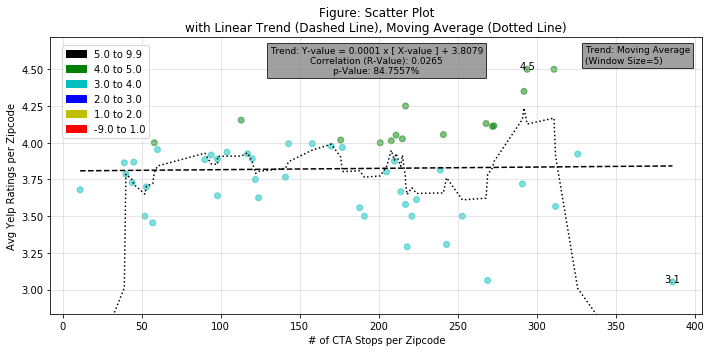

In [4]:
# Generate linear trend line
tl = gen_linear_trend( list(merged_rest_df['Total CTA Stops']), list(merged_rest_df['Avg Rating']) )

# Setup plot characteristics - including linear trend (dashed line) and moving average (dotted line)
plot_dict = {
    'chart_title':'Figure: Scatter Plot\nwith Linear Trend (Dashed Line), Moving Average (Dotted Line)',
#    'save_file':'Results/Scatter_Plot_Linear_Trend_and_Moving_Average.png',

    'data_df':merged_rest_df,
    'y_label':'Avg Yelp Ratings per Zipcode',
    'y_column':'Avg Rating',
    'color_list':'krybcgk',
    'color_thresh':[-9.0, 1.0, 2.0, 3.0, 4.0, 5.0, 9.9],

    'data_trend': tl['trend_line'],
    'data_trend_label': tl['trend_label'],
    'data_trend_label_loc_h': 0.5,
    'data_trend_label_loc_v': 0.97,
    
    'ma_window_size':5,
    'ma_label_loc_h': 0.82,
    'ma_label_loc_v': 0.90,

    'x_label':'# of CTA Stops per Zipcode',
    'x_column':'Total CTA Stops'
}

# Generate the scatter plot
gen_scatter_plot(plot_dict)